In [ ]:
!pip install vaderSentiment emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=732a49fde4e16274d7a979c6a31642c220f583830a1b1c7d06b79ac059dd1112
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
import sklearn

import pandas as pd
import numpy as np
import re, emoji, os
import yfinance as yf
import math
from sklearn import metrics

from tabulate import tabulate
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def display(data, filename):
    print("Data from {}".format(filename))
    print(tabulate(data, headers='keys', tablefmt='github'))
    print()
    
def sentimentScore(tweet_data):
    analyzer = SentimentIntensityAnalyzer()
    score_values = []
    for tweet in tweet_data:
        vs1 = analyzer.polarity_scores(tweet)
        print("Score: " + str(vs1))
        score_values.append(vs1)
    return score_values

In [ ]:
def get_bitcoin_data(start, end):
    # if os.path.exists("Dataset\\finance_data.csv"):
    #     data = pd.read_csv("Dataset\\finance_data.csv")
    #     return data
    finance_data = yf.download(tickers='BTC-USD', start=start, end=end, interval='5m')
    # finance_data.to_csv("Dataset\\finance_data.csv")
    return finance_data

In [ ]:
print("Data Read Initiated")
data = pd.read_csv("/content/sample_data/Bitcoin_tweets_dataset_2.csv", lineterminator='\n')
# data = pd.read_csv("Dataset\Bitcoin_tweets.csv", lineterminator='\n')
print("Data Read Successful")

data = data[["date", "text", "user_followers"]]
data["date"] = pd.to_datetime(data["date"])
data["user_followers"] = data["user_followers"].astype(int)
data["text"] = data["text"].str.strip()
data["text"] = data["text"].str.replace("\n"," ")
data['text'] = data['text'].str.replace(r"\s+", " ", regex=True)
# display(data.head(), "Subset columns")
data['text'] = data['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
data['text'] = data['text'].apply(lambda s: emoji.replace_emoji(s, ''))

display(data.head(50), "Subset columns")

sentiment_scores = pd.DataFrame(sentimentScore(data['text']))

Data Read Initiated
Data Read Successful


<ipython-input-10-95c8ce6fdbf1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data["date"])
<ipython-input-10-95c8ce6fdbf1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["user_followers"] = data["user_followers"].astype(int)
<ipython-input-10-95c8ce6fdbf1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Streaming output truncated to the last 5000 lines.
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compound': -0.5543}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Score: {'neg': 0.0, 'neu': 1

In [ ]:
# Filter for tweets within the 74 day time period
latest_date = data["date"].max()
date_before_30_days = latest_date - timedelta(days=100)
processed_data = pd.merge(data, sentiment_scores, left_index=True, right_index=True)
print("Length of merged data is {}".format(processed_data.shape))
processed_data = processed_data[(processed_data["date"] >= date_before_30_days) & \
                                (processed_data["date"] <= latest_date)]

# Filter for non-neutral tweets
processed_data = processed_data[processed_data["compound"] != 0]
# display(processed_data.head(20), "")
print("Length of compound > 0 data is {}".format(processed_data.shape))


# Filtering out user with 0 followers
processed_data = processed_data[processed_data["user_followers"] > 0]
# print("Length of user_followers > 0 data is {}".format(processed_data.shape))


# Calculating sentiment score by multiplying compound by user_followers
processed_data["sentiment score"] = processed_data["user_followers"] * processed_data["compound"]
processed_data.reset_index()


# Fetching BTC data from Yahoo Finance API
finance_data = get_bitcoin_data(processed_data.date.min(), processed_data.date.max())
print("Length of finance data is {}".format(finance_data.shape))


# Standardize the value
finance_data['stock_val_change'] = (finance_data['Close'] - finance_data['Open']) / finance_data['Open'] * 100.0


scaler = StandardScaler()
finance_data['stock_val_change_scaled'] = scaler.fit_transform(finance_data[['stock_val_change']])
print("Length of scaled finance data is {}".format(finance_data.shape))



Length of merged data is (169820, 7)
Length of compound > 0 data is (96866, 7)
[*********************100%***********************]  1 of 1 completed
Length of finance data is (2342, 6)
Length of scaled finance data is (2342, 8)


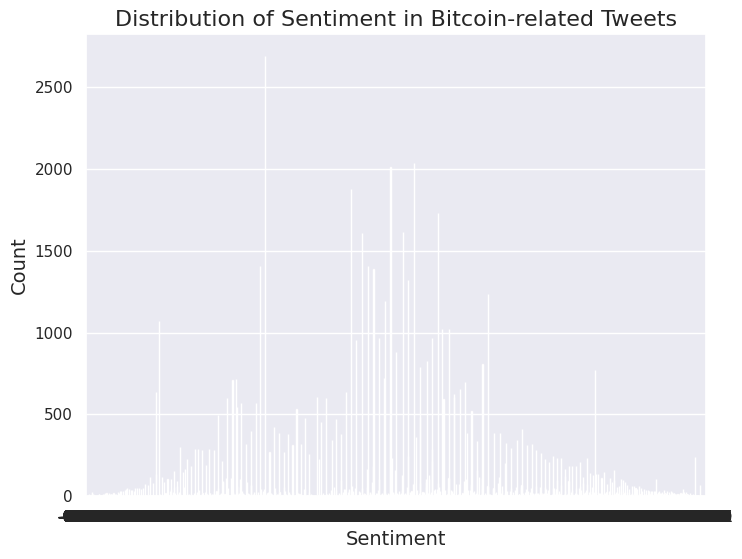

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed_data dataframe
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="compound", data=processed_data, color='red')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sentiment in Bitcoin-related Tweets', fontsize=16)
plt.show()

In [ ]:
# display(finance_data.head(), "")
# display(processed_data.head(), "")
# finance_data.reset_index(inplace=True)
finance_data["date"] = pd.to_datetime(finance_data.index)
processed_data["date"] = pd.to_datetime(processed_data["date"], utc=True)
finance_data.shape

finance_data.columns
finance_data.head()

,Open,High,Low,Close,Adj Close,Volume,stock_val_change,stock_val_change_scaled,date
Datetime,,,,,,,,,
2023-02-25 20:50:00+00:00,22865.539062,22903.525391,22865.539062,22903.525391,22903.525391,0,0.166129,2.027219,2023-02-25 20:50:00+00:00
2023-02-25 20:55:00+00:00,22917.109375,22925.666016,22917.109375,22923.080078,22923.080078,50686976,0.026053,0.325008,2023-02-25 20:55:00+00:00
2023-02-25 21:00:00+00:00,22915.734375,22946.921875,22915.734375,22946.921875,22946.921875,0,0.136096,1.662259,2023-02-25 21:00:00+00:00
2023-02-25 21:05:00+00:00,22943.921875,22947.767578,22942.361328,22942.361328,22942.361328,18748416,-0.006802,-0.074249,2023-02-25 21:05:00+00:00
2023-02-25 21:10:00+00:00,22931.982422,22936.062500,22923.740234,22923.740234,22923.740234,3621888,-0.035942,-0.428365,2023-02-25 21:10:00+00:00


In [ ]:
final_data = pd.merge(left=processed_data[["date","sentiment score"]], right=finance_data, left_on='date', right_on='Datetime')
final_data = final_data.drop(columns=["date_x","date_y"])
forecast_out = int(math.ceil(0.013 * len(final_data)))
final_data['stock_val_change_pred'] = final_data["stock_val_change"].shift(-forecast_out)
final_data['buy_sell'] = final_data['stock_val_change_pred'].apply(lambda x: 1 if x >=0 else -1)

print(len(final_data))
print(final_data.head())
final_data.dtypes
final_data = final_data.dropna()

1074
   sentiment score          Open          High           Low         Close  \
0       13410.9600  23559.181641  23569.218750  23559.181641  23569.218750   
1        7926.2718  23559.181641  23569.218750  23559.181641  23569.218750   
2         -36.3264  23559.181641  23569.218750  23559.181641  23569.218750   
3        2329.8647  23540.648438  23540.648438  23529.517578  23531.513672   
4         408.8483  23541.337891  23547.542969  23541.337891  23542.242188   

      Adj Close  Volume  stock_val_change  stock_val_change_scaled  \
0  23569.218750       0          0.042604                 0.526129   
1  23569.218750       0          0.042604                 0.526129   
2  23569.218750       0          0.042604                 0.526129   
3  23531.513672       0         -0.038804                -0.463148   
4  23542.242188       0          0.003841                 0.055084   

   stock_val_change_pred  buy_sell  
0               0.035275         1  
1               0.037997       

In [ ]:
final_data = final_data[["buy_sell", "sentiment score"]]

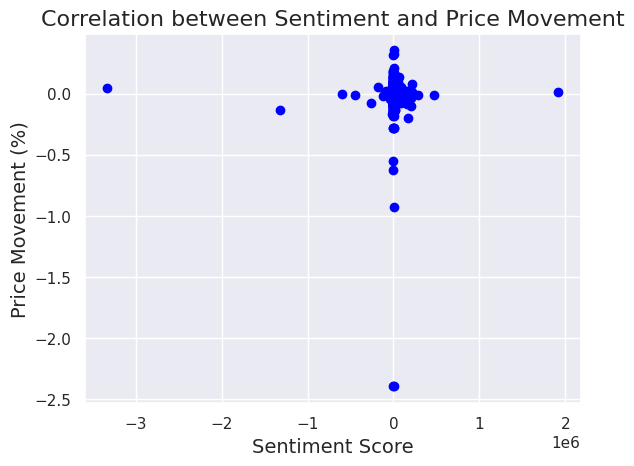

In [ ]:
#Correlation between sentiment and price
import matplotlib.pyplot as plt

# Load final_data dataframe
plt.scatter(final_data['sentiment score'], final_data["stock_val_change"], color='blue')
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Price Movement (%)', fontsize=14)
plt.title('Correlation between Sentiment and Price Movement', fontsize=16)
plt.show()


In [ ]:
#Logistic Regression
x_train, x_test, y_train, y_test = train_test_split(final_data.drop(columns=["buy_sell"]), final_data["buy_sell"],\
                                                        test_size=0.20)
scaler = StandardScaler()
# X_train = scaler.fit_transform(x_train)
print("x_train {}, x_test {}".format(x_train.shape, x_test.shape))

model = LogisticRegression(fit_intercept=True, solver="lbfgs", multi_class="auto", penalty=None)
model.fit(x_train, y_train)
model.score(x_train, y_train)

print("The co-efficient and intercepts are {} and {}".format(model.coef_, model.intercept_))

x_train (848, 10), x_test (212, 10)
The co-efficient and intercepts are [[ 7.19088267e-07 -7.95643194e-07 -7.95627100e-07 -7.95300306e-07
  -7.95419942e-07 -7.95419942e-07  2.55432630e-09  1.03656867e-12
   1.23000141e-11  4.61352662e-11]] and [-3.52752237e-11]


In [ ]:
test_output = pd.DataFrame(model.predict(x_test), index = x_test.index, columns=["Predicted Buy_Sell"])
test_output = test_output.merge(y_test, left_index=True, right_index=True)

y_test_pred = model.predict(x_test)
print(metrics.accuracy_score(y_test,y_test_pred))

0.4716981132075472


In [ ]:
#KNN

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_test_pred = knn.predict(x_test)
    print(accuracy_score(y_test, y_test_pred))
    accuracy_score_knn= accuracy_score(y_test, y_test_pred)

0.5047169811320755
0.5141509433962265
0.5235849056603774
0.5377358490566038


In [ ]:
from sklearn.svm import SVC

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=["buy_sell"]), final_data["buy_sell"], test_size=0.20)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#SVM model fitting
svm = SVC(kernel = 'linear', C = 1, random_state = 0)
svm.fit(X_train, y_train)

#Model evaluation
y_pred = svm.predict(X_test)
accuracy_score_svm = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred))


0.9764150943396226


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=["buy_sell"]), final_data["buy_sell"], test_size=0.20)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Random Forest model fitting
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

#Model evaluation
y_pred = rf.predict(X_test)
accuracy_score_rf = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred))


1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_data.drop(columns=["buy_sell"]), final_data["buy_sell"], test_size=0.20)

#Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Decision Tree model fitting
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train, y_train)

#Model evaluation
y_pred = dt.predict(X_test)
accuracy_score_dt = metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred))


1.0


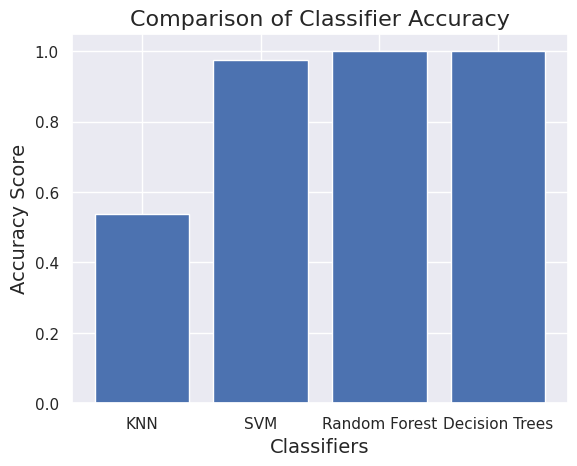

In [ ]:
import matplotlib.pyplot as plt

# Load accuracy scores for each classifier
accuracy_scores = [accuracy_score_knn, accuracy_score_svm, accuracy_score_rf, accuracy_score_dt]
classifiers = ['KNN', 'SVM', 'Random Forest', 'Decision Trees']

plt.bar(classifiers, accuracy_scores , color='green')
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Comparison of Classifier Accuracy', fontsize=16)
plt.show()
